In [64]:
import pandas as pd  #to manipulate the data,dataframe,access the data
import numpy as np  #to handle multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [65]:
df=pd.read_csv("used car data sales.csv") 
df.head(5)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [66]:
df.info() # about the data information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [67]:
'''
Total number of rows: 10000 entries, 0 to 9999
total columns : 12
dtypes: float64(2), int64(4), object(6)
duplicate : 0
drop columns
memory usage: 937.6+ KB
using scaling for balance values: 'fuel_type', 'brand', 'transmission', 'color', 'insurance_valid'], dtype='object'
'''

"\nTotal number of rows: 10000 entries, 0 to 9999\ntotal columns : 12\ndtypes: float64(2), int64(4), object(6)\nduplicate : 0\ndrop columns\nmemory usage: 937.6+ KB\nusing scaling for balance values: 'fuel_type', 'brand', 'transmission', 'color', 'insurance_valid'], dtype='object'\n"

In [68]:
# null value chack 
df.isnull().sum()  # null-vlaue chake present in service_history

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [69]:
(df.isnull().sum()/len(df))*100  #gives in percentage nulls


make_year              0.00
mileage_kmpl           0.00
engine_cc              0.00
fuel_type              0.00
owner_count            0.00
price_usd              0.00
brand                  0.00
transmission           0.00
color                  0.00
service_history       20.38
accidents_reported     0.00
insurance_valid        0.00
dtype: float64

In [70]:
df["service_history"].value_counts()

service_history
Full       4987
Partial    2975
Name: count, dtype: int64

In [71]:
df.duplicated().sum()  # chack duplicate valuve nonull valuves

np.int64(0)

In [72]:
# col drop 
df=df.drop(["service_history"],axis=1)
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,0,Yes


In [73]:
df.describe() 

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


<Axes: ylabel='engine_cc'>

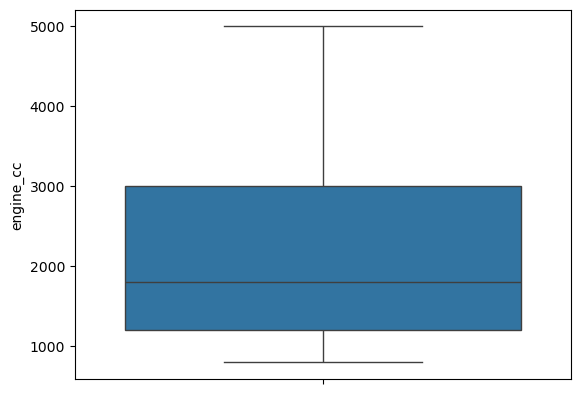

In [74]:
# checking for outliers
sns.boxplot(df["engine_cc"])   # here are no outlier

<Axes: ylabel='price_usd'>

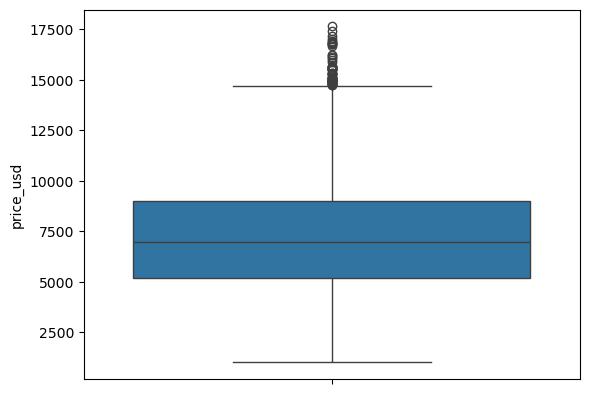

In [75]:
sns.boxplot(df["price_usd"])  # here are present oulier

<Axes: ylabel='accidents_reported'>

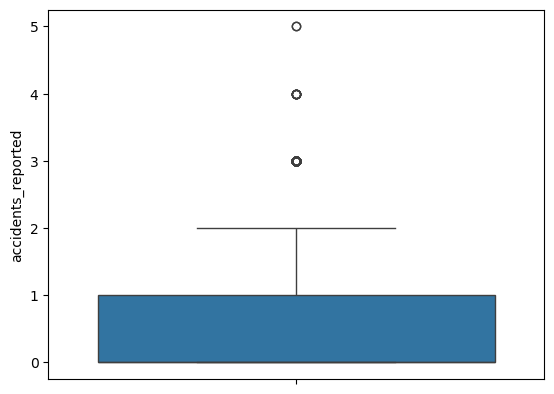

In [76]:
sns.boxplot(df["accidents_reported"])

In [77]:
# replce ouliers with meidan  age outlier hai to median se replace karte hai 
def replace_outliers_with_median_individual_mumerical_col(df):
    numerical_cols=["accidents_reported"]
    for column in numerical_cols:
        q1= df[column].quantile(0.25)
        q3= df[column].quantile(0.75)
        iqr= q3-q1
        lw= q1-1.5*iqr
        uw= q3+1.5*iqr
        median_value = df[column].median()
        #replace ouliers with median value
        # eg df.loc[(df["sumboling"]<0) | (df["symboling"]>2),"symboling"]
    df.loc[(df[column]<lw) |(df[column]>uw),column]=median_value
    return df
df=replace_outliers_with_median_individual_mumerical_col(df)
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,0,Yes


<Axes: ylabel='accidents_reported'>

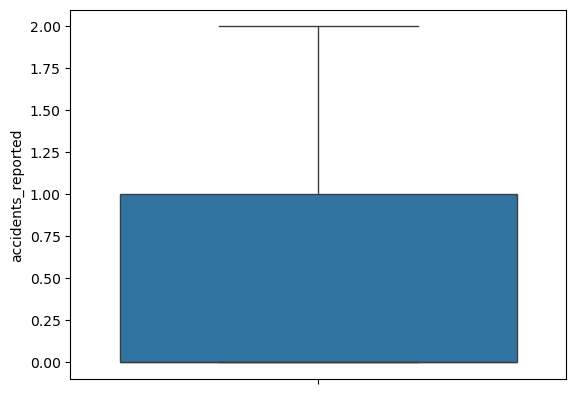

In [78]:
sns.boxplot(df["accidents_reported"])

In [79]:
def replace_outliers_with_median_individual_mumerical_col(df):
    numerical_cols=["price_usd"]
    for column in numerical_cols:
        q1= df[column].quantile(0.25)
        q3= df[column].quantile(0.75)
        iqr= q3-q1
        lw= q1-1.5*iqr
        uw= q3+1.5*iqr
        median_value = df[column].median()
        #replace ouliers with median value
        # eg df.loc[(df["sumboling"]<0) | (df["symboling"]>2),"symboling"]
    df.loc[(df[column]<lw) |(df[column]>uw),column]=median_value
    return df
df=replace_outliers_with_median_individual_mumerical_col(df)
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,0,Yes


<Axes: ylabel='price_usd'>

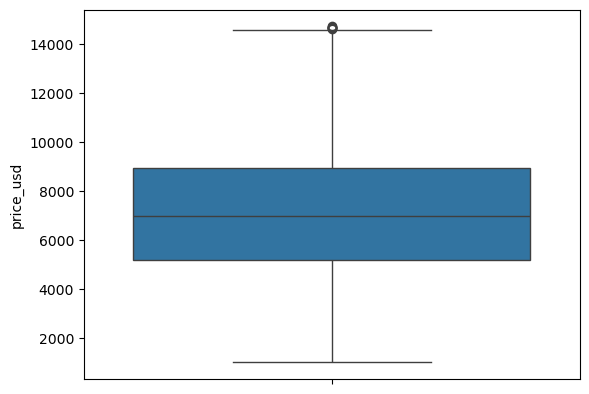

In [80]:
sns.boxplot(df["price_usd"])

<Axes: xlabel='price_usd', ylabel='Density'>

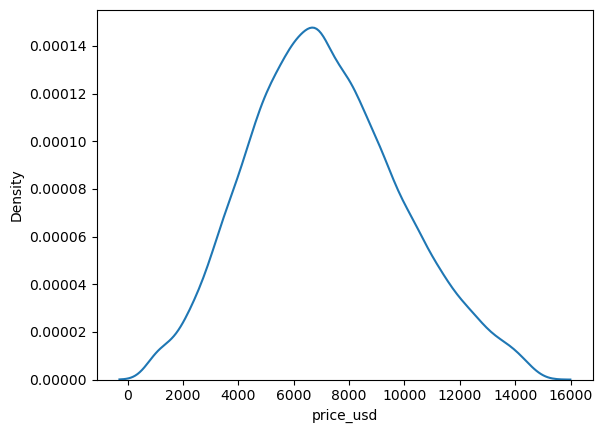

In [81]:
# check skewness
sns.kdeplot(df["price_usd"])
# almost normalyt distrubuted

<Axes: xlabel='accidents_reported', ylabel='Count'>

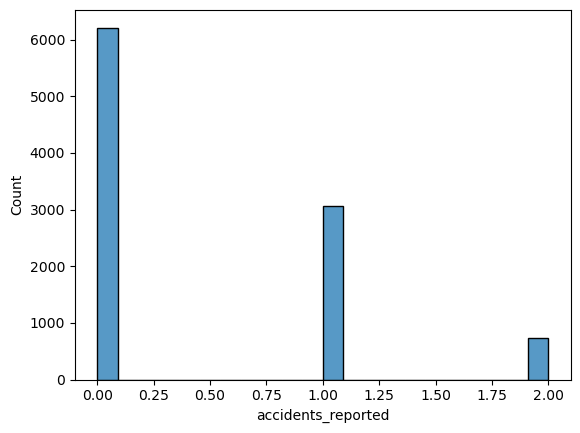

In [82]:
# check skewness
sns.histplot(df["accidents_reported"])
# almost normalyt distrubuted

In [83]:
obje_col=df.select_dtypes("object").columns
obje_col

Index(['fuel_type', 'brand', 'transmission', 'color', 'insurance_valid'], dtype='object')

In [84]:
# using scaling for balenced for valures
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[obje_col]=enc.fit_transform(df[obje_col])
df[obje_col]

,fuel_type,brand,transmission,color,insurance_valid
0,2.0,1.0,1.0,5.0,0.0
1,2.0,3.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,2.0,4.0,1.0,1.0,1.0
4,2.0,6.0,0.0,3.0,1.0
...,...,...,...,...,...
9995,2.0,4.0,1.0,4.0,1.0
9996,0.0,3.0,1.0,2.0,1.0
9997,0.0,5.0,1.0,0.0,1.0
9998,2.0,0.0,0.0,1.0,1.0


In [85]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  float64
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  float64
 7   transmission        10000 non-null  float64
 8   color               10000 non-null  float64
 9   accidents_reported  10000 non-null  int64  
 10  insurance_valid     10000 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 859.5 KB


In [86]:
from scipy.stats import skew
skew(df["price_usd"]) # no skewness

np.float64(0.2648338347376203)

In [87]:
from scipy.stats import skew
skew(df["accidents_reported"]) # no skewness

np.float64(1.068434818665929)

In [88]:
numerical_cols=df.select_dtypes([int,float]).columns
numerical_cols

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'accidents_reported',
       'insurance_valid'],
      dtype='object')

<Axes: >

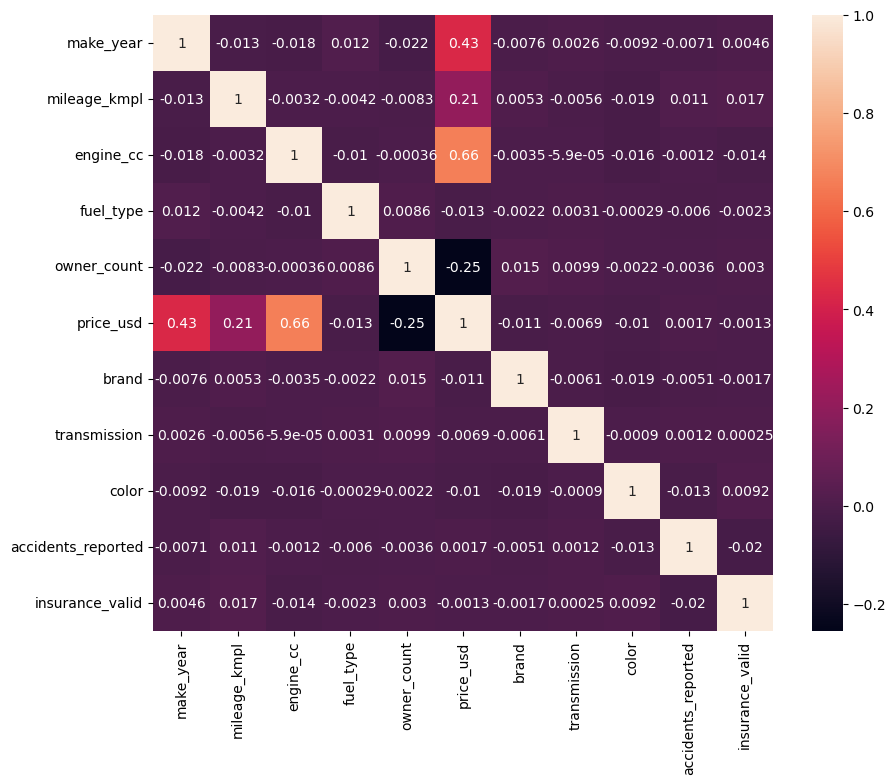

In [89]:
  plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(),annot=True)# no multi co-linerty found 

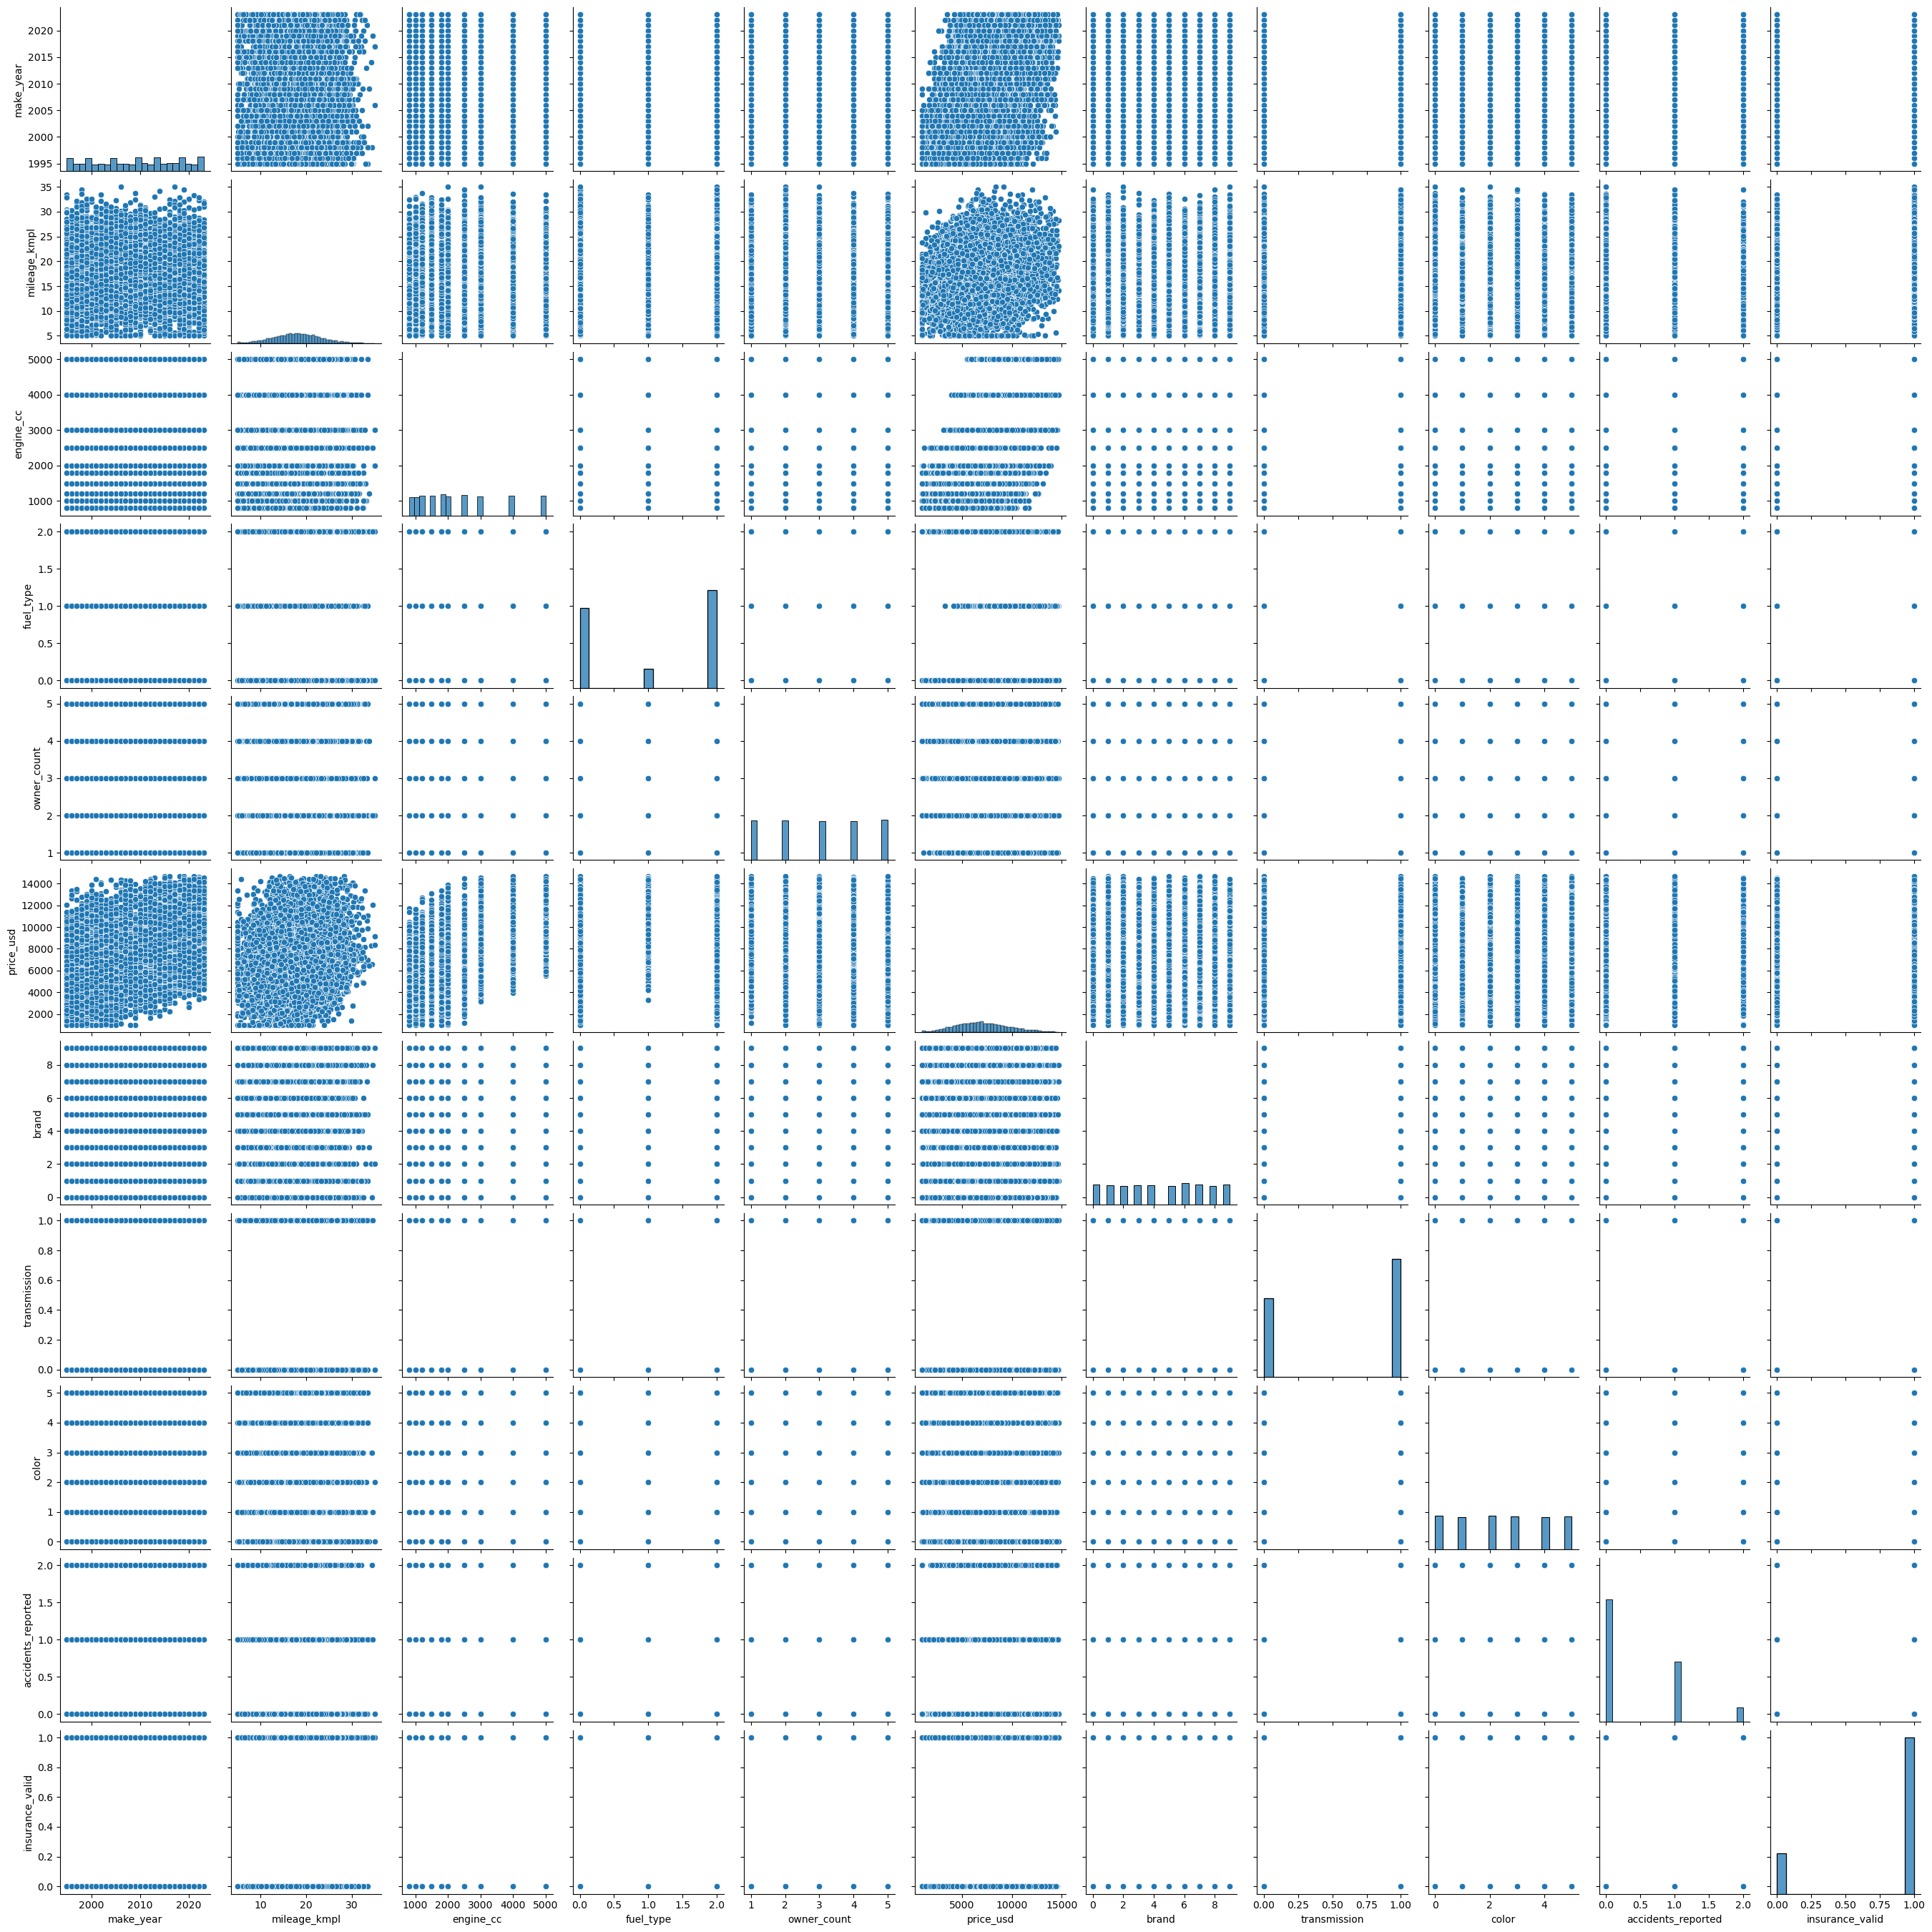

In [90]:
sns.pairplot(df)  # ovel dikhe to aacha hai for linear rigression
# that linearity exist

In [91]:
features=df.drop('price_usd',axis=1)
target=df['price_usd']

In [92]:
print(features.shape,target.shape)

(10000, 10) (10000,)


In [93]:
# standardscaling          #It arranges the data in a standard normal distribution
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
features.iloc[:]=scaler.fit_transform(features.iloc[:])
features.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,brand,transmission,color,accidents_reported,insurance_valid
0,-0.980111,-1.948317,1.326559,0.961209,0.702338,-1.220709,0.819051,1.473034,-0.720191,-1.959661
1,0.572417,-0.073778,-0.609605,0.961209,0.702338,-0.526296,0.819051,-1.455812,-0.720191,0.510292
2,1.647244,0.025720,0.164861,-1.153662,1.407142,-1.567915,-1.220926,-1.455812,0.873152,0.510292
3,-0.024709,-1.329441,-1.151732,0.961209,-1.412076,-0.179089,0.819051,-0.870043,-0.720191,0.510292
4,-0.502410,-1.140395,-0.996838,0.961209,-0.707271,0.515324,-1.220926,0.301495,-0.720191,0.510292


In [94]:
from sklearn.model_selection import train_test_split   # 80% data train karayala dila jato 80-20 ha valid data asto tymula 80 data apan train karyala dial 
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1)


In [95]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(8000, 10) (8000,)
(2000, 10) (2000,)


In [96]:
#linearRegration
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(xtrain,ytrain)  
ypred=lr.predict(xtest)

In [97]:
f=pd.DataFrame({"Columns":xtrain.columns,
               "Coefficient":lr.coef_})
lr.intercept_     # value of c in linear eqn, y=mx+c

np.float64(7134.533323991183)

In [98]:
from sklearn.metrics import mean_squared_error,r2_score   #

mse=mean_squared_error(ytest,ypred)

r2=r2_score(ytest,ypred)

print(f"MSE : {mse}")

print(f"R2 : {r2}")

MSE : 1792814.7153487974
R2 : 0.7585292777394654


In [99]:
# checking for homoscedascity --

<Axes: ylabel='price_usd'>

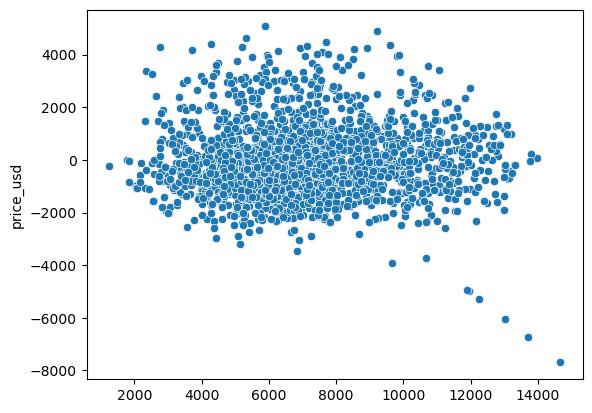

In [100]:
sns.scatterplot(x=ypred,y=(ytest - ypred)) # constant varience -   satisfied

<Axes: xlabel='price_usd', ylabel='Density'>

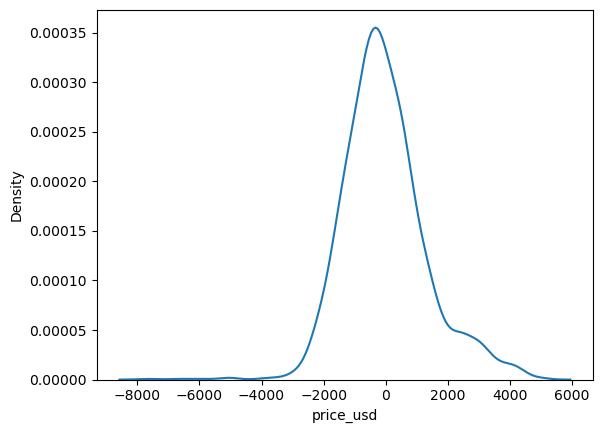

In [101]:
# checking for normality of residuals(erros)-- notsatisfied
sns.kdeplot((ytest - ypred))

In [102]:
# linearity, homoscedascity, normality conditions are satisfied0

# no multi co-relation condition not satisfied

In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
xtrainp = poly.fit_transform(xtrain)
xtestp = poly.transform(xtest)

In [104]:
xtrain.shape

(8000, 10)

In [105]:
xtrainp.shape 

(8000, 66)

In [106]:
r = LinearRegression()
lr.fit(xtrainp, ytrain)
ypred = lr.predict(xtestp)

In [107]:
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f"MSE : {mse}")
print(f"R2 : {r2}")

MSE : 1152115.8563709352
R2 : 0.844823759207276


In [108]:
lr.score(xtrainp, ytrain)

0.8242169327506865